<a href="https://colab.research.google.com/github/favourphilic/EverythingHamoye/blob/main/HamoyeStageA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
ndf = pd.read_csv('/content/drive/MyDrive/HamoyeEverything/FoodBalanceSheets_E_Africa_NOFLAG.csv',encoding='latin 1' )
ndf.shape

(60943, 12)

In [6]:
ndf.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [8]:
ndf['Element'].value_counts()


Domestic supply quantity                  5295
Import Quantity                           5139
Protein supply quantity (g/capita/day)    5023
Fat supply quantity (g/capita/day)        5023
Food supply (kcal/capita/day)             5014
Food                                      4941
Food supply quantity (kg/capita/yr)       4905
Residuals                                 4655
Export Quantity                           4403
Stock Variation                           4232
Production                                3881
Processing                                2010
Losses                                    2009
Other uses (non-food)                     1732
Feed                                      1319
Seed                                       762
Tourist consumption                        555
Total Population - Both sexes               45
Name: Element, dtype: int64

In [9]:
cat = [ var for var in ndf.columns if ndf[var].dtypes == 'O']
num = [var for var in ndf.columns if ndf[var].dtypes != 'O']

In [10]:
print(len(cat))
print(len(num))

4
8


In [11]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [12]:
ndf.duplicated().any()

False

In [13]:
ndf.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [14]:
ndf.isnull().sum() / len(ndf) *100

Area Code       0.000000
Area            0.000000
Item Code       0.000000
Item            0.000000
Element Code    0.000000
Element         0.000000
Unit            0.000000
Y2014           2.607354
Y2015           2.540078
Y2016           2.518747
Y2017           2.471162
Y2018           2.356300
dtype: float64

In [26]:
ndf.groupby('Element')['Y2017'].sum()

Element
Domestic supply quantity                  2088198.10
Export Quantity                            182338.80
Fat supply quantity (g/capita/day)          10253.84
Feed                                       223705.68
Food                                      1258888.28
Food supply (kcal/capita/day)              454681.00
Food supply quantity (kg/capita/yr)         48690.04
Import Quantity                            294559.09
Losses                                     160614.00
Other uses (non-food)                       91645.97
Processing                                 292836.00
Production                                2030056.89
Protein supply quantity (g/capita/day)      11842.45
Residuals                                   35500.00
Seed                                        24870.14
Stock Variation                             54316.91
Total Population - Both sexes             1112641.00
Tourist consumption                            91.00
Name: Y2017, dtype: float64

In [16]:
S = [['him', 'sell'], [90, 28, 43]]

S[0][1][1]

'e'

In [18]:
for col in cat:
    print(ndf[col].value_counts())

Kenya                          1560
Egypt                          1488
Nigeria                        1474
Côte d'Ivoire                  1467
Senegal                        1462
Cameroon                       1460
Uganda                         1458
Zambia                         1451
Malawi                         1447
Ethiopia                       1447
Madagascar                     1439
Mozambique                     1427
Rwanda                         1426
Angola                         1424
United Republic of Tanzania    1419
Congo                          1413
Guinea                         1410
Burkina Faso                   1409
Niger                          1403
South Africa                   1399
Zimbabwe                       1393
Morocco                        1393
Mauritius                      1378
Botswana                       1378
Ghana                          1354
Central African Republic       1344
Chad                           1343
Tunisia                     

In [44]:
#Creating a new vairable that store protein supply in madagascar
protein = ndf[ ndf['Element']=='Protein supply quantity (g/capita/day)']

In [46]:
MDGprt = protein[protein['Area']=='Madagascar']
MDGprt.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
30718,129,Madagascar,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,44.45,43.26,43.35,43.94,44.17
30721,129,Madagascar,2903,Vegetal Products,674,Protein supply quantity (g/capita/day),g/capita/day,35.43,34.04,33.96,34.47,34.81


In [47]:
MDGprt['Y2015'].sum()

173.04999999999998

In [45]:
protein.shape

(5023, 12)

In [28]:
ndf.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018'],
      dtype='object')

In [30]:
#To obtain the number of uniques countries in the dataset
ndf['Area'].nunique()

49

In [31]:
ndf.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [32]:
nndf= ndf.dropna()

In [33]:
nndf.isnull().sum()

Area Code       0
Area            0
Item Code       0
Item            0
Element Code    0
Element         0
Unit            0
Y2014           0
Y2015           0
Y2016           0
Y2017           0
Y2018           0
dtype: int64

In [34]:
nndf.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000,57784.000000
mean,134.499342,2690.495656,3745.422868,137.831770,138.990488,140.376380,144.927790,148.027664
std,72.651212,146.625825,2217.914615,1588.660769,1625.441821,1662.732983,1695.436448,1735.920219
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2563.000000,674.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2633.000000,5142.000000,0.140000,0.130000,0.130000,0.160000,0.130000
75%,196.000000,2781.000000,5301.000000,9.000000,9.000000,9.000000,10.000000,10.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


In [35]:
corrlation = ndf.corr()

In [36]:
corrlation

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


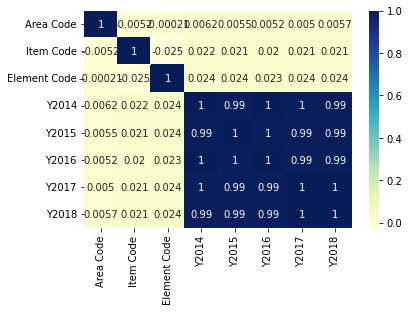

In [37]:
sns.heatmap(corrlation, cmap="YlGnBu", annot=True)
plt.show()

In [40]:
ndf.groupby('Area')['Y2017'].sum().sort_values(ascending=False)

Area
Nigeria                        1483268.23
Egypt                           866379.92
South Africa                    517590.54
Ethiopia                        448683.76
Morocco                         388495.36
Ghana                           337599.06
Algeria                         325644.27
United Republic of Tanzania     322616.85
Kenya                           264660.66
Sudan                           239931.92
Cameroon                        232030.43
Angola                          229159.57
Côte d'Ivoire                   224599.01
Uganda                          213950.38
Malawi                          181098.71
Mozambique                      161407.98
Mauritania                      156665.46
Mali                            149928.33
Madagascar                      131197.73
Niger                           126707.58
Benin                           124771.22
Tunisia                         124167.20
Zambia                          103223.77
Burkina Faso                 

In [41]:
ndf.groupby('Element')['Y2017'].sum()

Element
Domestic supply quantity                  2088198.10
Export Quantity                            182338.80
Fat supply quantity (g/capita/day)          10253.84
Feed                                       223705.68
Food                                      1258888.28
Food supply (kcal/capita/day)              454681.00
Food supply quantity (kg/capita/yr)         48690.04
Import Quantity                            294559.09
Losses                                     160614.00
Other uses (non-food)                       91645.97
Processing                                 292836.00
Production                                2030056.89
Protein supply quantity (g/capita/day)      11842.45
Residuals                                   35500.00
Seed                                        24870.14
Stock Variation                             54316.91
Total Population - Both sexes             1112641.00
Tourist consumption                            91.00
Name: Y2017, dtype: float64

In [48]:
array  = ([[94, 89, 63],

             [93, 92, 48],

             [92, 94, 56]])

In [55]:
ndf.groupby('Element').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,,,,
Domestic supply quantity,708993,14197445,28068795,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,599910,11840553,26026133,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),675050,13535000,3435732,10225.56,10235.74,10102.77,10253.84,10258.69
Feed,176272,3538507,7282199,216927.89,225050.22,228958.65,223705.68,233489.68
Food,663295,13285035,25406622,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),674057,13511060,3329296,454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),658446,13185401,3163725,49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,688174,13795966,28834929,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,274353,5424803,10292107,153223.00,155439.00,157787.00,160614.00,163902.00


In [56]:
ndf.groupby('Item').sum()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Item,,,,,,,,
"Alcohol, Non-Food",38447,752497,1515090,2403.00,2180.00,2223.00,2348.00,2293.00
Alcoholic Beverages,75016,1649136,2171381,102410.11,98783.72,96958.75,95581.06,97847.27
Animal Products,18060,397035,90990,11935.65,11811.73,11661.69,11547.65,11578.61
Animal fats,85279,1882494,2567303,209460.54,200675.72,183314.22,269617.53,269648.27
Apples and products,69280,1352989,1920418,9499.23,10559.15,9853.26,10198.90,9640.51
...,...,...,...,...,...,...,...,...
"Vegetables, Other",77779,1518715,2275409,155038.96,158104.08,156218.90,157752.59,163987.21
Vegetal Products,18060,391905,90990,107145.19,107064.17,106792.72,107655.20,107775.39
Wheat and products,87073,1639683,2654934,232670.13,234710.51,239377.07,240047.62,242645.19
